In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

import tensorflow as tf
import random
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


# Loading dataset
df = pd.read_csv("Telco-Customer-Churn")
print("shape:",df.shape)
df.head()

shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
# EDA
# Getting basic info and quick stats

df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# duplicates
print("duplicates:", df.duplicated().sum())

# missing values per column
df.isnull().sum()

# check empty strings
(df == "").sum()


duplicates: 0


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64



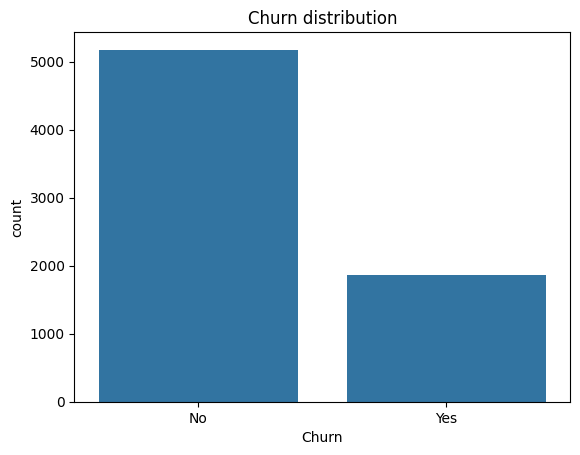

In [38]:
print (df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))
print()
sns.countplot(data=df ,x='Churn')
plt.title('Churn distribution')
plt.show()

In [39]:
# coverting data type of TotalCharges if obejct
print(df['TotalCharges'].dtype)

df['TotalCharges']  = pd.to_numeric(df['TotalCharges'],errors ='coerce')
df['TotalCharges'].isnull().sum()

object


np.int64(11)

In [40]:
# Categorical columns
cat_cols= df.select_dtypes(include=['object']).columns.tolist()
print ("Categorical cols: ", cat_cols)
for c in cat_cols:
  print(c , ":", df[c].nunique())
  print(df[c].value_counts().head())
  print()


Categorical cols:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
customerID : 7043
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
Name: count, dtype: int64

gender : 2
gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner : 2
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents : 2
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService : 2
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines : 3
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService : 3
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity : 3
On

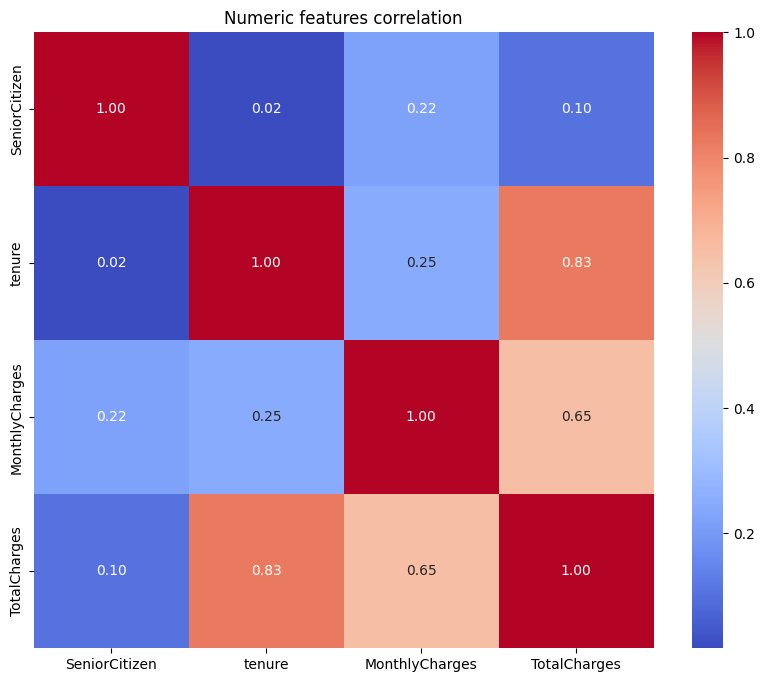

In [41]:
#Correlation matrix for numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Numeric features correlation")
plt.show()


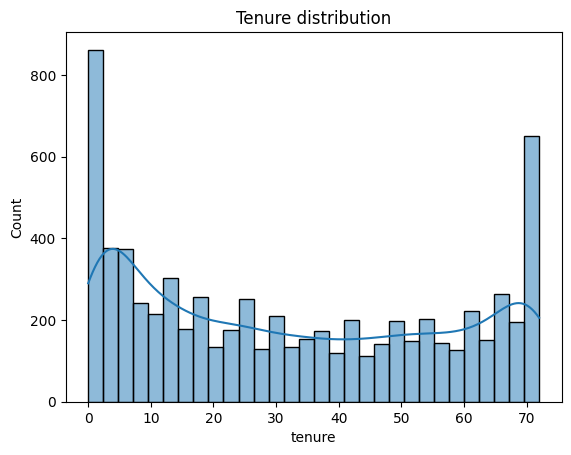

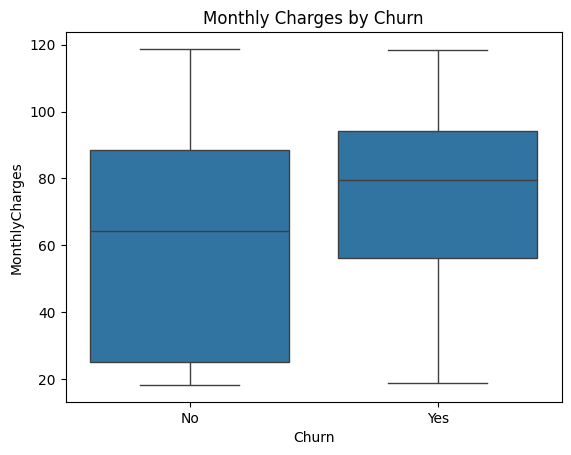

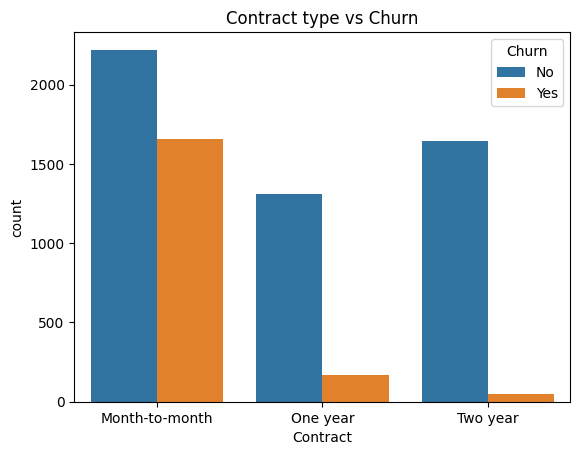

In [42]:
# Visualizations
# Tenure
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Tenure distribution')
plt.show()

# MonthlyCharges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

# Contract vs Churn
pd.crosstab(df['Contract'], df['Churn'], normalize='index')
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract type vs Churn')
plt.show()


In [43]:
# Preprocessing

# 1) Dropping cutomerId

df= df.drop('customerID',axis=1)

In [44]:
# 2)Fixing the 11 missing TotalCharges rows

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [45]:
# 3) encoding and Converting categorical cols --> numeric
cat_cols

# encoding churn Yes = 1 , No = 0
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# one-hot encoding

df = pd.get_dummies(df, drop_first=True)

# Selecting numeric features again after encoding

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('Churn')




/tmp/ipython-input-2851134028.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


In [46]:
# 4) splitting Train -Test

y=df['Churn']
X = df.drop('Churn',axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [47]:
# 5) Applying SMOTE

from imblearn.over_sampling import SMOTE
sm= SMOTE (random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print ("Class balance after SMOTE:")
print (y_train.value_counts())

Class balance after SMOTE:
Churn
0    4139
1    4139
Name: count, dtype: int64


In [48]:
# 6) Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Gini Accuracy: 0.7203690560681334

 Gini Classification Report :
                precision    recall  f1-score   support

           0       0.82      0.79      0.81      1035
           1       0.48      0.53      0.50       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.72      0.72      1409

Gini ROC-AUC: 0.6593660389056809



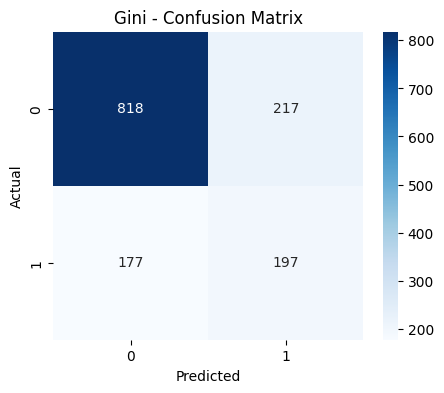

In [49]:
# Training mdoel

# Training decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix

# Decision Tree using Gini

dt_gini = DecisionTreeClassifier(criterion ='gini',random_state = 42 )
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)

print ("Gini Accuracy:" , accuracy_score(y_test,y_pred_gini))
print("\n Gini Classification Report :\n ", classification_report(y_test , y_pred_gini))

# ROC-AUC for Gini
y_proba_gini = dt_gini.predict_proba(X_test)[:, 1]
print("Gini ROC-AUC:", roc_auc_score(y_test, y_proba_gini))
print()

# Confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test , y_pred_gini),annot=True,fmt='d',cmap='Blues')
plt.title("Gini - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Entropy Accuracy:  0.723207948899929

Entropy Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1035
           1       0.48      0.55      0.51       374

    accuracy                           0.72      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.74      0.72      0.73      1409

Entropy ROC-AUC: 0.6691854607455631



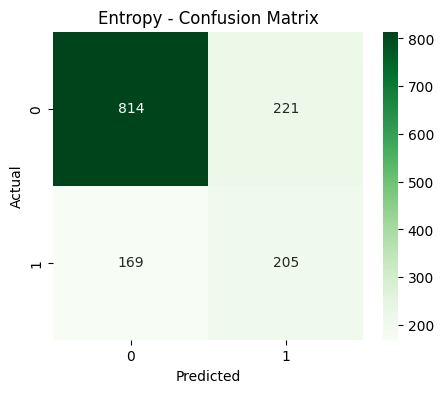

In [50]:
# Decision tree using Entropy

dt_entropy = DecisionTreeClassifier(criterion="entropy",random_state= 42)
dt_entropy.fit(X_train,y_train)

y_pred_entropy = dt_entropy.predict(X_test)

print("Entropy Accuracy: ", accuracy_score(y_test,y_pred_entropy))
print("\nEntropy Classification Report:\n", classification_report(y_test,y_pred_entropy))

# ROC-AUC for Entropy
y_proba_entropy = dt_entropy.predict_proba(X_test)[:, 1]
print("Entropy ROC-AUC:", roc_auc_score(y_test, y_proba_entropy))
print()


# Confusion matrix

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, fmt='d', cmap='Greens')
plt.title("Entropy - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# parameter grid - the values for the GridSearch to try

param_grid ={
    'criterion':['gini','entropy'],
    'max_depth':[None,3,5,7,9,12,15],
    'min_samples_split':[2,5,10,20],
    'min_samples_leaf':[1,2,4,6,8],
    'max_features':[None,'sqrt','log2']

}

dt = DecisionTreeClassifier(random_state= 42)

grid_search =GridSearchCV(
    estimator = dt ,
    param_grid= param_grid,
    cv = 5,
    scoring='accuracy',
    n_jobs = -1

)

grid_search.fit(X_train,y_train)

print("Best Parameters:",grid_search.best_params_)
print("Best cv Accuracy:",grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best cv Accuracy: 0.8098675511187003


Test Accuracy after Tuning: 0.7558552164655784

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1035
           1       0.54      0.61      0.57       374

    accuracy                           0.76      1409
   macro avg       0.69      0.71      0.70      1409
weighted avg       0.77      0.76      0.76      1409

Tuned DT ROC-AUC: 0.7658968198610142



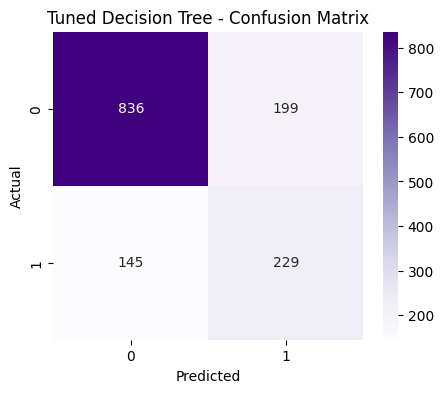

In [23]:
best_dt = grid_search.best_estimator_
y_pred= best_dt.predict(X_test)

print("Test Accuracy after Tuning:", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

# ROC-AUC for Tuned Decision Tree
y_proba_best = best_dt.predict_proba(X_test)[:, 1]
print("Tuned DT ROC-AUC:", roc_auc_score(y_test, y_proba_best))
print()

# Confusion Matrix for Tuned Decision Tree
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Tuned Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [24]:
# Neural network based model
# libraries for neural network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


In [25]:
# Buiding baseline for neural network

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Adding early stopping to prevent overfitting

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)


In [27]:
history = model.fit(
    X_train,y_train,
    validation_split = 0.2,
    epochs = 50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7153 - loss: 0.5675 - val_accuracy: 0.7258 - val_loss: 0.6008
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7726 - loss: 0.4722 - val_accuracy: 0.7687 - val_loss: 0.5402
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7867 - loss: 0.4545 - val_accuracy: 0.7923 - val_loss: 0.5058
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7934 - loss: 0.4441 - val_accuracy: 0.8110 - val_loss: 0.4732
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7968 - loss: 0.4367 - val_accuracy: 0.8219 - val_loss: 0.4438
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7979 - loss: 0.4316 - val_accuracy: 0.8261 - val_loss: 0.4288
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8013 - loss: 0.4271 - val_accuracy: 0.8309 - val_loss: 0.4129
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8050 - loss: 0.4234 - val_accuracy: 0.

In [28]:
# Evaluating on test data

y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

loss , acc = model.evaluate(X_test,y_test)
print("Test Accuracy:" , acc)

print("\nClassification Report:\n",classification_report(y_test,y_pred_nn))

# ROC-AUC for Baseline NN
y_proba_nn = model.predict(X_test)
print("Baseline NN ROC-AUC:", roc_auc_score(y_test, y_proba_nn))


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7723 - loss: 0.4746
Test Accuracy: 0.7714691162109375

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      1035
           1       0.57      0.54      0.56       374

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Baseline NN ROC-AUC: 0.8135420703195642


In [29]:
# HyperParameter tuned neural network

# More neurons (64,32,16)
# BatchNormalization for stable training
# Dropout to reduce overfitting
# Same early stopping

tuned_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

tuned_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

tuned_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 192 (768.00 B)

In [30]:
# the same early stopping
early_stop = EarlyStopping(
    monitor ='val_loss',
    patience=5,
    restore_best_weights = True
)

# Training tuned model
tuned_history = tuned_model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs= 50,
    batch_size = 32,
    callbacks=[early_stop],
    verbose =1
)

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5918 - loss: 0.7355 - val_accuracy: 0.6262 - val_loss: 0.6748
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7602 - loss: 0.4951 - val_accuracy: 0.7790 - val_loss: 0.4530
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7831 - loss: 0.4603 - val_accuracy: 0.8249 - val_loss: 0.4029
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7889 - loss: 0.4474 - val_accuracy: 0.8315 - val_loss: 0.3818
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7974 - loss: 0.4333 - val_accuracy: 0.8774 - val_loss: 0.3077
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7894 - loss: 0.4330 - val_accuracy: 0.8551 - val_loss: 0.3600
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7972 - loss: 0.4288 - val_accuracy: 0.8635 - val_loss: 0.3405
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8066 - loss: 0.4241 - val_accuracy: 0.

In [31]:
# Evaluating tuned model

#Predictions
y_pred_tuned =tuned_model.predict(X_test)
y_pred_tuned = (y_pred_tuned >0.5).astype(int)

#Evaluation

loss_tuned , acc_tuned =tuned_model.evaluate(X_test,y_test)
print("Tuned Model Test Accuracy:",acc_tuned)

print ("\n Classification Report (Tuned Model):\n")
print(classification_report(y_test,y_pred_tuned))

# ROC-AUC for Tuned NN
y_proba_tuned = tuned_model.predict(X_test)
print("Tuned NN ROC-AUC:", roc_auc_score(y_test, y_proba_tuned))




45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7703 - loss: 0.4591
Tuned Model Test Accuracy: 0.7750177383422852

 Classification Report (Tuned Model):

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1035
           1       0.58      0.56      0.57       374

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.77      1409

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tuned NN ROC-AUC: 0.8272598103800151


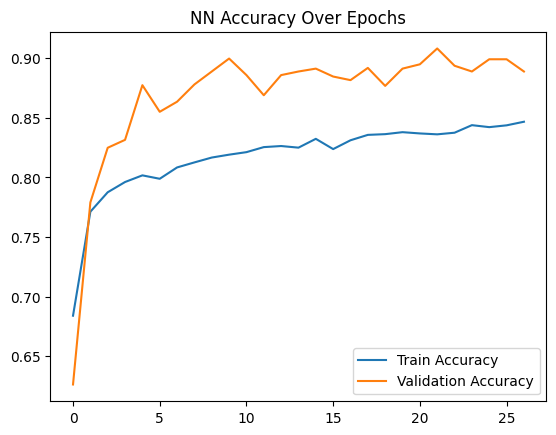

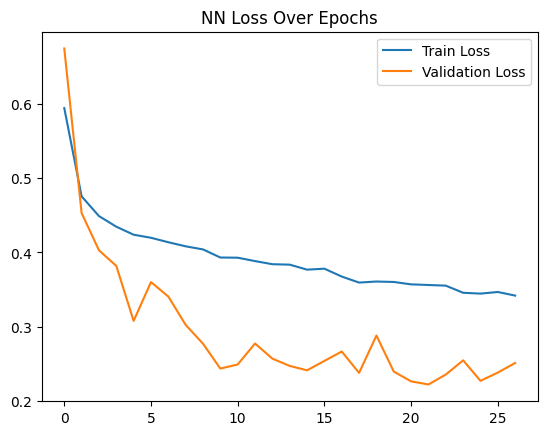

In [32]:

# Plotting the training curves
plt.plot(tuned_history.history['accuracy'], label='Train Accuracy')
plt.plot(tuned_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("NN Accuracy Over Epochs")
plt.show()

plt.plot(tuned_history.history['loss'], label='Train Loss')
plt.plot(tuned_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("NN Loss Over Epochs")
plt.show()



45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


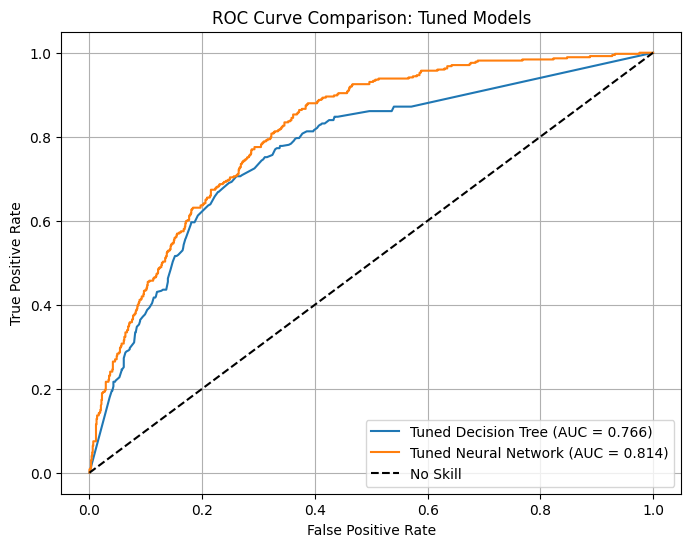

In [33]:
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- ROC for Tuned Decision Tree ---
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# --- ROC for Tuned Neural Network ---
y_proba_nn = model.predict(X_test).ravel()   # ensuring it is flattened
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# --- Combined ROC Curve ---
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Tuned Decision Tree (AUC = {roc_auc_dt:.3f})")
plt.plot(fpr_nn, tpr_nn, label=f"Tuned Neural Network (AUC = {roc_auc_nn:.3f})")

# Baseline
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Tuned Models")
plt.legend()
plt.grid(True)
plt.show()


In [34]:
# Overall report
print("Gini Report:\n", classification_report(y_test, y_pred_gini))
print("Gini ROC-AUC:", roc_auc_score(y_test, y_proba_gini))

print("Entropy Report:\n", classification_report(y_test, y_pred_entropy))
print("Entropy ROC-AUC:", roc_auc_score(y_test, y_proba_entropy))

print("Tuned DT Report:\n", classification_report(y_test, y_pred))
print("Tuned DT ROC-AUC:", roc_auc_score(y_test, y_proba_best))

print("Baseline NN Report:\n", classification_report(y_test, y_pred_nn))
print("Baseline NN ROC-AUC:", roc_auc_score(y_test, y_proba_nn))

print("Tuned NN Report:\n", classification_report(y_test, y_pred_tuned))
print("Tuned NN ROC-AUC:", roc_auc_score(y_test, y_proba_tuned))


Gini Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1035
           1       0.48      0.53      0.50       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.72      0.72      1409

Gini ROC-AUC: 0.6593660389056809
Entropy Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1035
           1       0.48      0.55      0.51       374

    accuracy                           0.72      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.74      0.72      0.73      1409

Entropy ROC-AUC: 0.6691854607455631
Tuned DT Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1035
           1       0.54      0.61      0.57       374

    accuracy                           0.76      1409
   macro a